In [1]:
%matplotlib inline
from modsim import *

In [2]:
t0=0
t_end=500
t_eruption=10
p0=45000
birth_rate= .03
death_rate= .01

In [3]:
system = System(t0=t0, 
                t_end=t_end,
                t_eruption=t_eruption,
                p0=p0,
                birth_rate=birth_rate,
                death_rate=death_rate)

In [4]:
def eruption(current_pop, death_toll):
    pop_after_eruption = current_pop - current_pop*death_toll
    return pop_after_eruption

In [49]:
def run_simulation(system, update_func, death_toll):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system, death_toll)
    system.results = results

In [59]:
def update_funcP(pop_t, t, system, death_toll):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    if t==system.t_eruption:
        pop_t = eruption(pop_t, death_toll)
    net_growth = system.birth_rate * pop_t - system.death_rate * pop_t
    return pop_t + net_growth

In [60]:
def plot_results(system,title=None):
    plot(system.results)
    decorate(xlabel='Years',
             ylabel='Population',
             title=title)

0      4.500000e+04
1      4.590000e+04
2      4.681800e+04
3      4.775436e+04
4      4.870945e+04
5      4.968364e+04
6      5.067731e+04
7      5.169086e+04
8      5.272467e+04
9      5.377917e+04
10     5.485475e+04
11     4.196388e+04
12     4.280316e+04
13     4.365922e+04
14     4.453241e+04
15     4.542306e+04
16     4.633152e+04
17     4.725815e+04
18     4.820331e+04
19     4.916738e+04
20     5.015072e+04
21     5.115374e+04
22     5.217681e+04
23     5.322035e+04
24     5.428476e+04
25     5.537045e+04
26     5.647786e+04
27     5.760742e+04
28     5.875957e+04
29     5.993476e+04
           ...     
472    3.868609e+08
473    3.945981e+08
474    4.024901e+08
475    4.105399e+08
476    4.187507e+08
477    4.271257e+08
478    4.356682e+08
479    4.443816e+08
480    4.532692e+08
481    4.623346e+08
482    4.715813e+08
483    4.810129e+08
484    4.906332e+08
485    5.004458e+08
486    5.104548e+08
487    5.206638e+08
488    5.310771e+08
489    5.416987e+08
490    5.525326e+08


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


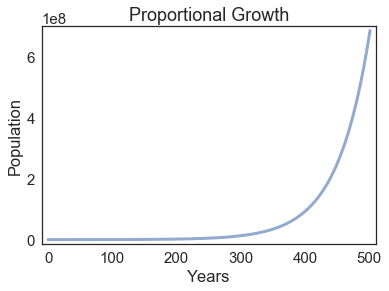

In [63]:
run_simulation(system,update_funcP, .25)
newfig()
plot_results(system,title='Proportional Growth')
print (system.results)

In [64]:
def update_funcQ(pop_t, t, system, death_toll):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    if t==system.t_eruption:
        pop_t = eruption(pop_t, death_toll)
    net_growth = system.r * pop_t*(1-pop_t/system.K)
        
    return pop_t + net_growth

In [65]:
system.K= 70000
system.r= .005

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


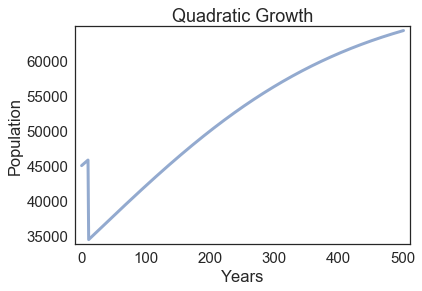

In [66]:
run_simulation(system, update_funcQ, .25)
newfig()
plot_results(system,title='Quadratic Growth')

In [67]:
death_toll_array=(0,.1,.2,.3,.4,.5)

In [68]:
def sweep_death_toll(update_func):
    for d in death_toll_array:
        run_simulation(system,update_func, d)
        plot_results(system,title='Death Toll Sweep')
        

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


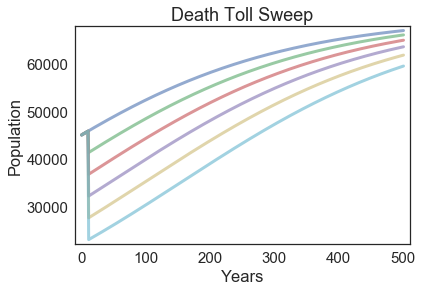

In [69]:
newfig()
sweep_death_toll(update_funcQ)
